<a href="https://colab.research.google.com/github/ssoon/ssoon.github.io/blob/master/Matlab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Matlab 3
# Sam Soon

# Problem 1

# Part a

In [123]:
import scipy.linalg as sp
import numpy as np
import sympy as sy
from numpy import linalg as LA
import random
import matplotlib.pyplot as plt

#Create and print random 4x4 matrix
A = sy.randMatrix(4, 4, -10, 10)
print("A = ", A.as_immutable, "\n")

# Find characteristic polynomial of A by taking det(A - lambda)
M = sy.eye(4)*sy.symbols('lambda')
print("The characteristic polynomial of A is ", sy.det(A - M), "\n")

#Use QR decomposition to factor the matrix
A_fact = A.QRdecomposition()
print("Q = ", A_fact[0].as_immutable, "\n")
print("R = ", A_fact[1].as_immutable, "\n")

A =  <bound method DenseMatrix.as_immutable of Matrix([
[ 5, 10,  -5,  9],
[ 2, -9,  -9, -3],
[ 2, -3, -10, -4],
[-6,  1,  10,  3]])> 

The characteristic polynomial of A is  lambda**4 + 11*lambda**3 + 13*lambda**2 + 668*lambda + 2769 

Q =  <bound method DenseMatrix.as_immutable of Matrix([
[ 5*sqrt(69)/69,  590*sqrt(881751)/881751,   -6460*sqrt(459456166)/689184249,  128*sqrt(35954)/53931],
[ 2*sqrt(69)/69, -661*sqrt(881751)/881751,     523*sqrt(459456166)/689184249,  190*sqrt(35954)/53931],
[ 2*sqrt(69)/69,   -19*sqrt(881751)/67827,    -1433*sqrt(459456166)/35342782,  -65*sqrt(35954)/35954],
[-2*sqrt(69)/23,   63*sqrt(881751)/293917, -29047*sqrt(459456166)/1378368498, 275*sqrt(35954)/107862]])> 

R =  <bound method DenseMatrix.as_immutable of Matrix([
[sqrt(69),  20*sqrt(69)/69,          -41*sqrt(69)/23,                 13*sqrt(69)/69],
[       0, sqrt(881751)/69, 2453*sqrt(881751)/293917,       8848*sqrt(881751)/881751],
[       0,               0,  3*sqrt(459456166)/12779, 5663*sq

# Part B


In [ ]:
# Compute characteristic polynomial using charpoly

print("Characteristic polynomial: ", A.charpoly(), "\n")

#Find roots of polynomial, counting how many real roots there are
r = sy.roots(A.charpoly())
real_count = 0
print("Roots: \n")
for i in r:
    print(i, "\n")
    if i.is_real:
      real_count = real_count + 1
print("Number of real eigenvalues: ", real_count, "\n")


# Part C

In [ ]:
# Find eigenvalues 
B = A.T*A
print(B.eigenvals(), "\n")
print(B.as_immutable)

#print(B.eigenvects())

# Part D

In [115]:
#D = LA.eig(B)

TypeError: ignored

# Problem 2

# Part A

The populations of adults and juveniles can be expressed by the following system of equations, where on average an adult births 1.6 juveniles per year, and 30% of juveniles survive, and 80% of adults survive:

$j_{k + 1} = 1.6a_k$

$a_{k + 1} = 0.3j_k + 0.8a_k$

This can be expressed as the following matrix:

$A = 
\begin{bmatrix}
0 & 1.6\\
0.3 & 0.8\\
\end{bmatrix}
$

# Part B

The characteristic equation of A is:

$ (0 - \lambda)(0.8-\lambda) - 0.3*1.6$

$ = \lambda^2 - 0.8\lambda - .48$

The zeroes/eigenvalues for this equation are 1.2 and -0.4. We can now rewrite $x_0$ as $c_1v_1 + c_2v_2$

$x_k = Ax_0 = c_1(1.2^k)v_1 + c_2(-0.4^k)v_2$

As $k \rightarrow \infty$, $c_2(-0.4^k)v_2 \rightarrow 0$, leaving us with:

$x_k = Ax_0 = c_1(1.2^k)v_1$ as $k \rightarrow \infty$

Therefore, the population is growing, and will eventually grow by 1.2x every year. To find the eventual juvenile to adult ratio, we will find the eigenvector of the dominant eigenvalue:

$(A - 1.2I)
\begin{bmatrix}
x\\
y\\
\end{bmatrix} = 0$

$r_1: -1.2x + 1.6y = 0$

$r_2: 0.3x - 0.4y = 0$

$r_1 \rightarrow r_1 + 4r_2$

$r_1: 0$

$r_2: 0.3x -0.4y = 0$

$0.3x = 0.4y$

$v = \begin{bmatrix}
4\\
3\\
\end{bmatrix}$

Therefore, the eventual juvenile to adult ratio is 4:3.

# Part D


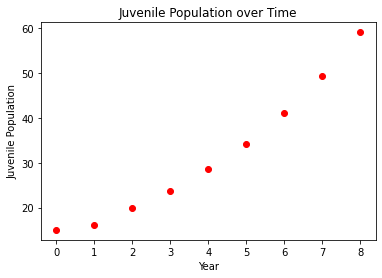

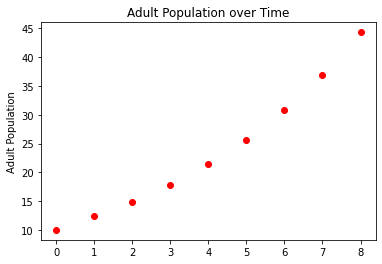

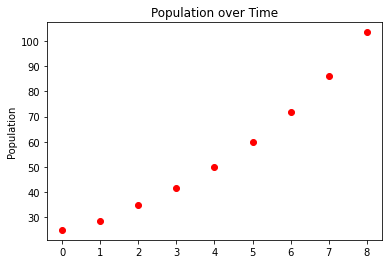

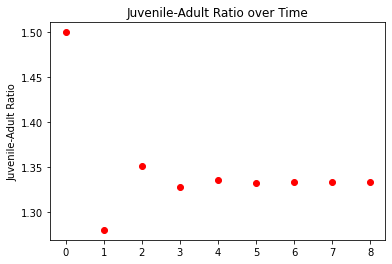

In [121]:
#function that finds the juvenile and adult populations for the first n years
def pop_func(n, j, a):
  if n==0:
    return j, a
  else:
    j_1 = 1.6*a[-1]
    a_1 = 0.3*j[-1] + 0.8*a[-1]
    j.append(j_1)
    a.append(a_1)
    return pop_func(n-1, j, a)

#Get juvenile/adult populations for the first 8 years, then make lists needed for each plot
results = pop_func(8, [15], [10])
j_pop = results[0]
a_pop = results[1]
total_pop = np.add(j_pop, a_pop)
ratio = np.divide(j_pop, a_pop)

#plot each list
plt.plot(j_pop, 'ro')
plt.xlabel('Year')
plt.ylabel('Juvenile Population')
plt.title('Juvenile Population over Time')
plt.show()

plt.plot(a_pop, 'ro')
plt.ylabel('Adult Population')
plt.title('Adult Population over Time')
plt.show()

plt.plot(total_pop, 'ro')
plt.ylabel('Population')
plt.title('Population over Time')
plt.show()

plt.plot(ratio, 'ro')
plt.ylabel('Juvenile-Adult Ratio')
plt.title('Juvenile-Adult Ratio over Time')
plt.show()

The juvenile-adult ratio seems to stabilize around year 3.